<h1>Analisis exploratorio de los datos</h1>

Mediante el analisis exploratorio de los datos esperamos comprender el funcionamiento en frecuencias, clasificaciones, sesgos y particularidades de los datos.

El dataset se compone de 3565 registros de NCBI, BC5CDR y datos sinteticos guardados en un CSV

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Carga del dataset

from pathlib import Path

base_path = Path().resolve().parent   # sube de notebooks/ a project_name/
csv_path = base_path / "data" / "dataset.csv"

df = pd.read_csv(csv_path, sep=";")

In [44]:
df.head()

,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


<h2>Estructura del dataset</h2>

Se compone de 3 columas:

<ol>
    <li><b>title:</b> Contiene los titulos de los registros y articulos</li>
    <li><b>abstract:</b> Contiene el contenido (presumiblemente el resumen) de los registros y articulos</li>
    <li><b>group:</b> Contiene las clasificaciones de cada uno de los articulos, estas se dividen en cardiovascular, oncological, hepatorenal y neurological, cada clasificacion (si es que el registro tiene mas de una clasificacion) esta separada por una barra vertical "|"</li>
</ol>

In [46]:
from random import randint

rd = randint(0, len(df) - 1)

print(df["abstract"][rd])
print(df["title"][rd])
print(df["group"][rd])

The recently cloned human breast and ovarian cancer susceptibility gene , BRCA1 , is located on human chromosome 17q21 . We have isolated murine genomic clones containing Brca1 as a first step in generating a mouse model for the loss of BRCA1 function . A mouse genomic library was screened using probes corresponding to exon 11 of the human BRCA1 gene . Two overlapping mouse clones were identified that hybridized to human BRCA1 exons 9-12 . Sequence analysis of 1 . 4 kb of the region of these clones corresponding to part of human exon 11 revealed 72 % nucleic acid identity but only 50 % amino acid identity with the human gene . The longest of the mouse Brca1 genomic clones maps to chromosome 11D , as determined by two-color fluorescence in situ hybridization . The synteny to human chromosome 17 was confirmed by cohybridization with the mouse probe for the NF1-gene . This comparative study confirms that the relative location of the BRCA1 gene has been conserved between mice and humans .


<h2>Analisis de la variable respuesta</h2>

En este caso es una clasificacion multiclase, por lo tanto se debe profundizar en la misma.

In [47]:
col = "group"

# Número de valores únicos
print("Valores únicos:", df[col].nunique())

# Lista de categorías
print("\nCategorías únicas:")
print(df[col].unique())

# Frecuencia relativa (%)
print("\nFrecuencia relativa (%):")
print(df[col].value_counts(normalize=True) * 100)

# Información de valores nulos
print("\nValores nulos:", df[col].isnull().sum())


Valores únicos: 15

Categorías únicas:
['neurological|hepatorenal' 'neurological' 'hepatorenal' 'cardiovascular'
 'neurological|oncological' 'cardiovascular|hepatorenal' 'oncological'
 'neurological|cardiovascular' 'cardiovascular|oncological'
 'neurological|hepatorenal|oncological'
 'neurological|cardiovascular|hepatorenal' 'hepatorenal|oncological'
 'cardiovascular|hepatorenal|oncological'
 'neurological|cardiovascular|hepatorenal|oncological'
 'neurological|cardiovascular|oncological']

Frecuencia relativa (%):
group
neurological                                           29.677419
cardiovascular                                         18.092567
hepatorenal                                            14.950912
neurological|cardiovascular                             8.639551
oncological                                             6.647966
neurological|hepatorenal                                5.666199
cardiovascular|hepatorenal                              5.329593
neurological|oncolo

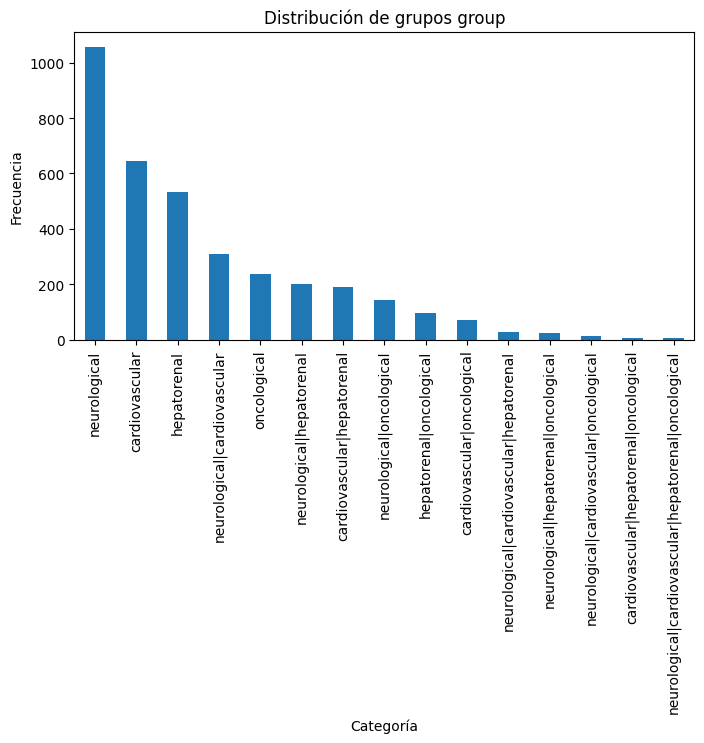

In [ ]:
# Visualización de la distribución de clases

import matplotlib.pyplot as plt

df[col].value_counts().plot(kind="bar", figsize=(8,4))
plt.title(f"Distribución de grupos {col}")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.show()


<h2>Analisis de la columna: abstract</h2>


Estadísticas de longitud de palabras:
count    3565.000000
mean      100.056662
std        93.066759
min        22.000000
25%        31.000000
50%        37.000000
75%       172.000000
max       525.000000
Name: word_count, dtype: float64


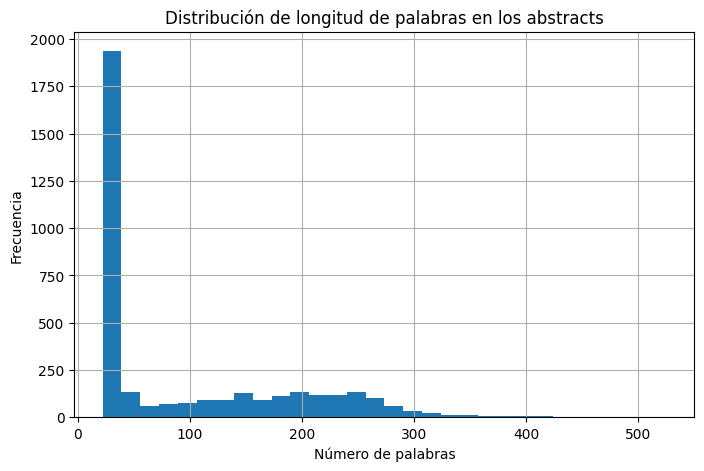

In [28]:
col = "abstract"

df["word_count"] = df[col].fillna("").apply(lambda x: len(str(x).split()))

print("\nEstadísticas de longitud de palabras:")
print(df["word_count"].describe())

plt.figure(figsize=(8,5))
df["word_count"].hist(bins=30)
plt.title("Distribución de longitud de palabras en los abstracts")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


In [26]:
df["word_count"].mean(), df["word_count"].median()

(np.float64(100.05666199158485), np.float64(37.0))

<h2>Analisis de la columna: title</h2>


Estadísticas de longitud de palabras:
count    3565.000000
mean        8.729032
std         4.878152
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        38.000000
Name: word_count_title, dtype: float64


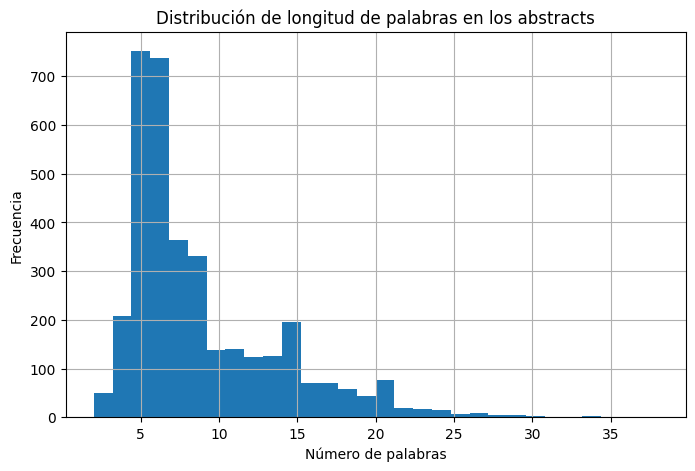

In [29]:
col = "title"

df["word_count_title"] = df[col].fillna("").apply(lambda x: len(str(x).split()))

print("\nEstadísticas de longitud de palabras:")
print(df["word_count_title"].describe())

plt.figure(figsize=(8,5))
df["word_count_title"].hist(bins=30)
plt.title("Distribución de longitud de palabras en los abstracts")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

Esto nos da como resultado, que la frecuencia de palabras para cada distribucion, sigue una distribucion sesgada hacia la derecha, por lo que esto debe tenerse en cuenta a la hora de escoger el modelo que lo evalue, debido a que tambien puede incurrir en un sesgo para el modelo.

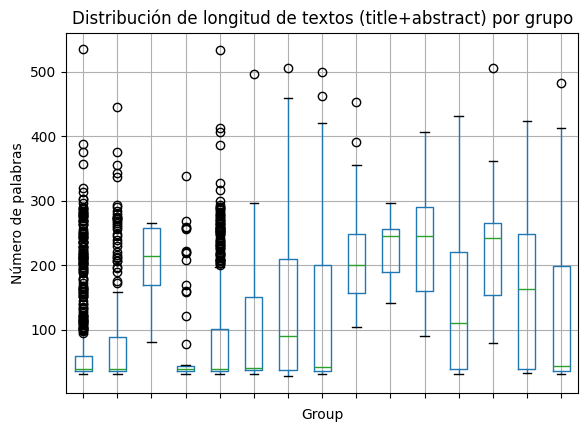

In [ ]:
from collections import Counter

# Unir título y abstract en una sola columna de texto
df["text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.strip()

# Contar palabras en el texto
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Visualizar distribución de longitud por grupo
fig, ax = plt.subplots()
df.boxplot(column="word_count", by="group", ax=ax, figsize=(10,6))
plt.title("Distribución de longitud de textos (title+abstract) por grupo")
plt.suptitle("")
plt.xlabel("Group")
ax.set_xticklabels([])
plt.ylabel("Número de palabras")
plt.show()

# Funcion para calcular palabras más frecuentes por grupo
def top_words(texts, n=10):
    words = " ".join(texts).lower().split()
    return Counter(words).most_common(n)



Se ven diferencias respecto a la frecuencia de los textos en promedio, sin embargo, las varianzas son tan altas que puede ser dificil que un modelo vaya a clasificar mediante esta distribucion de frecuencia.

In [ ]:
# Visualización de la distribución de clases con word_count y text

df.head()

,title,abstract,group,text,word_count
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal,Adrenoleukodystrophy: survey of 303 cases: bio...,221
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological,endoscopy reveals ventricular tachycardia secr...,37
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal,dementia and cholecystitis: organ interplay Pu...,40
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological,The interpeduncular nucleus regulates nicotine...,112
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological,guillain-barre syndrome pathways in leukemia H...,32


<h2>NLP</h2>

Decidimos usar la libreria Spacy para realizar el procesamiento NLP, mediante la eliminacion de las stop words y ademas el uso de lemmatizacion, lower casing y visualizacion, para saber si entre clases hay alguna(s) palabras que fueran representativas o frecuentes, que nos ayuden en la clasificacion.

In [ ]:
# Preprocesado con spaCy + frecuencias por grupo + gráficas top-5
import spacy
import math

# Intentar cargar el modelo; ajustar si usas otro nombre de modelo
try:
    nlp = spacy.load("en_core_web_sm", disable=["ner"])  # deshabilitamos NER para rapidez
except Exception as e:
    raise RuntimeError(
        "No se pudo cargar 'en_core_web_sm'. Instálalo con:\n"
        "pip install spacy\npython -m spacy download en_core_web_sm\n\n"
        f"Error: {e}"
    )

In [ ]:
def preprocess_doc(doc):
    """
    Devuelve lista de lemas limpios de un Doc de spaCy:
    - solo alfabeticos (is_alpha)
    - no stopwords
    - lemas en minúscula
    - longitud mínima > 1 (elimina 'a', 'I', etc.)
    """
    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            lemma = token.lemma_.lower().strip()
            if len(lemma) > 1:
                tokens.append(lemma)
    return tokens

In [ ]:
texts = df["text"].fillna("").astype(str).tolist()

# Procesar en batches con nlp.pipe
token_lists = []
for doc in nlp.pipe(texts, batch_size=50):
    token_lists.append(preprocess_doc(doc))

df["tokens"] = token_lists
df["preprocessed_text"] = df["tokens"].apply(lambda toks: " ".join(toks))

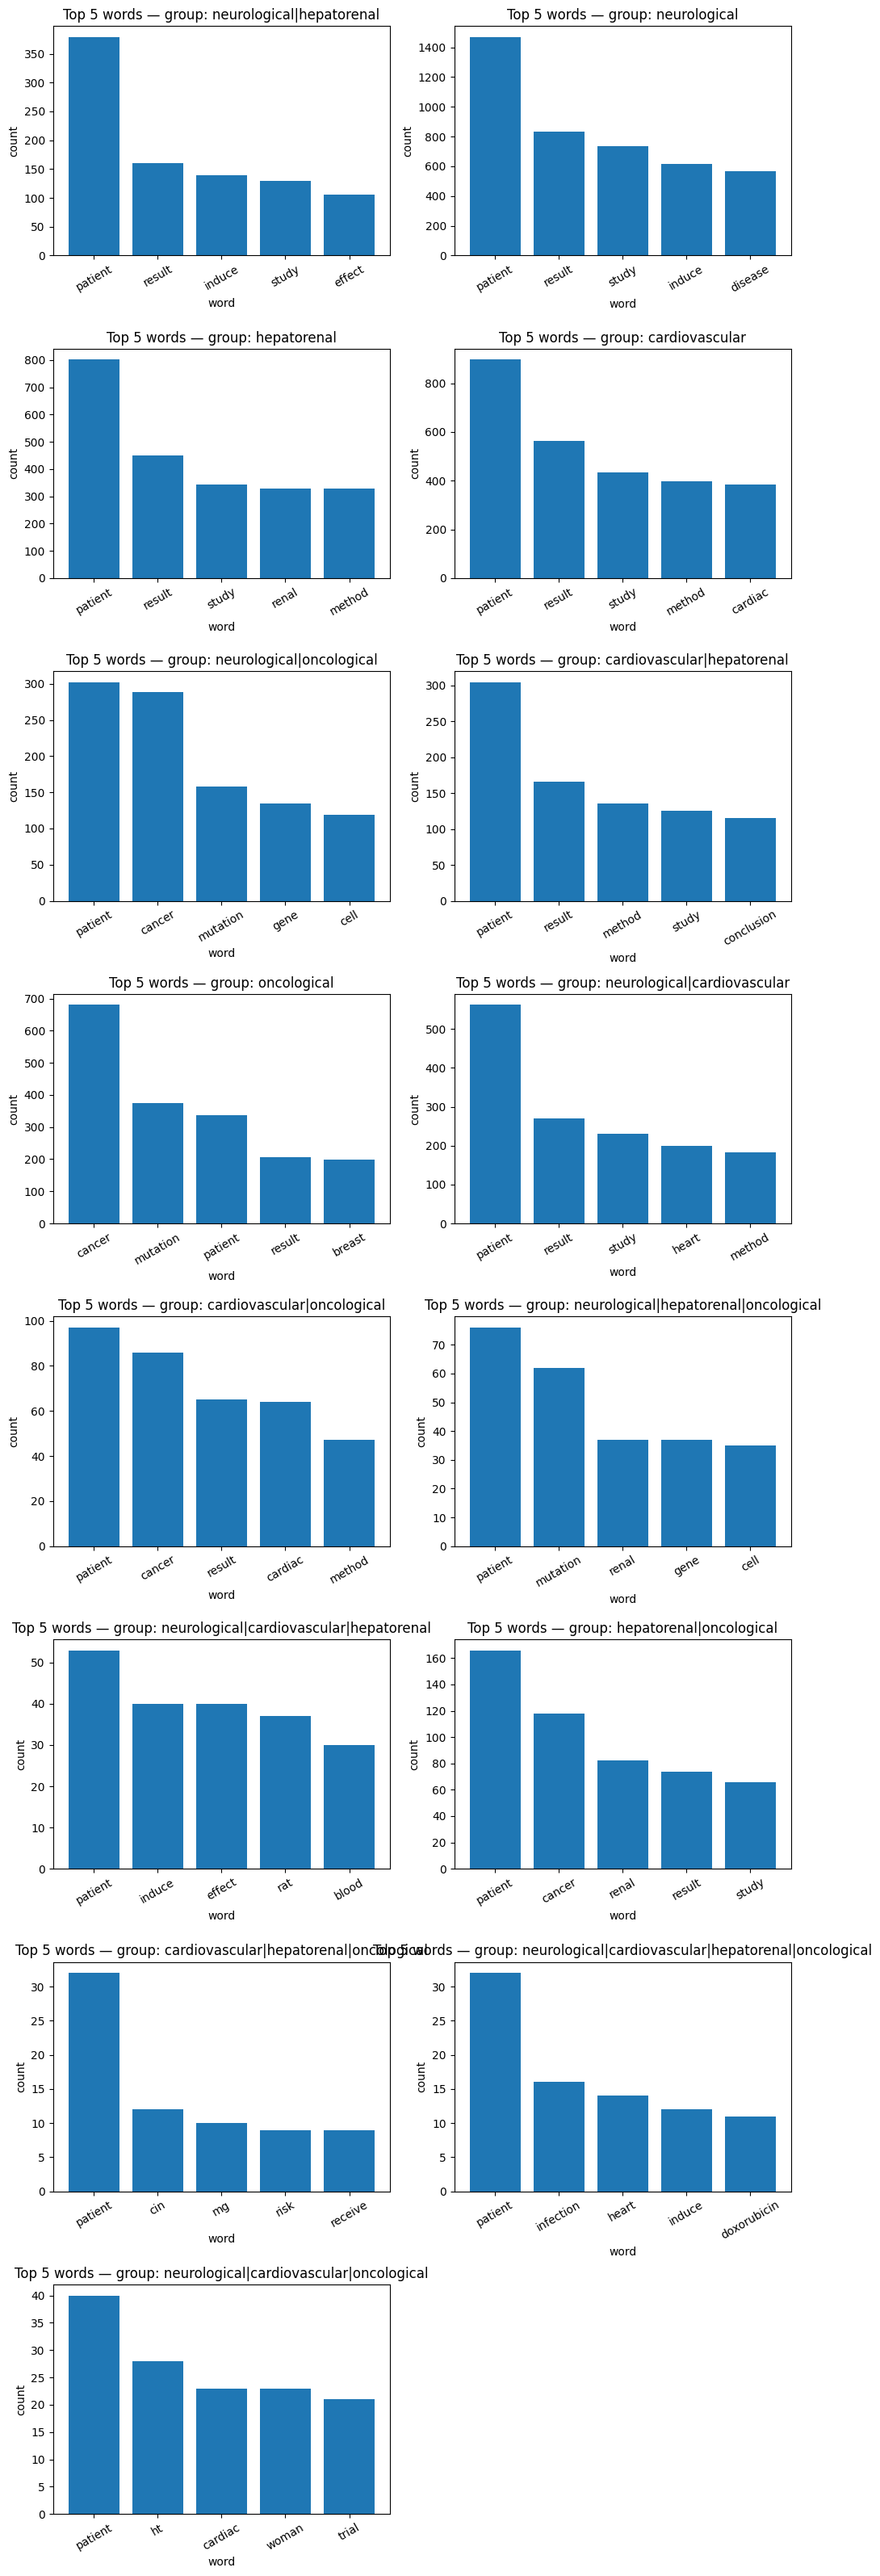

In [ ]:
# Calculo de frecuencias por grupo
group_topk = {}
k = 5

for g in df["group"].dropna().unique():
    # concatenar todos los tokens de ese grupo
    tokens_flat = [t for toks in df.loc[df["group"] == g, "tokens"] for t in toks]
    counter = Counter(tokens_flat)
    topk = counter.most_common(k)
    group_topk[g] = topk

#Graficando un subplot por grupo
groups = list(group_topk.keys())
n_groups = len(groups)
cols = 2
rows = math.ceil(n_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), squeeze=False)

for i, g in enumerate(groups):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    topk = group_topk[g]
    words = [w for w, _ in topk]
    counts = [cnt for _, cnt in topk]
    ax.bar(words, counts)
    ax.set_title(f"Top {k} words — group: {g}")
    ax.set_xlabel("word")
    ax.set_ylabel("count")
    ax.tick_params(axis='x', rotation=30)

# eliminar ejes vacíos si hay
total_plots = rows * cols
if total_plots > n_groups:
    for j in range(n_groups, total_plots):
        r = j // cols
        c = j % cols
        fig.delaxes(axes[r][c])

plt.tight_layout()
plt.show()


Estas graficas nos dan a entender que las palabras no actuan por frecuencia de forma tan diferente entre diferentes clases, sin embargo hay algunas que si son exclusivas, mas sin embargo, al consultar con expertos, en la mayoria de los casos no eran palabras que fueran realmente significativas en la realidad, es decir, no eran exclusivas de esa clasificacion.

La siguiente idea es realizar un analisis PCA de los vectores medios de cada clase, esto se hace en el notebook <i>PCA_embedings_analisis.ipynb</i>